In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


url_trainandval = "/kaggle/input/int305/train.csv"
url_test = "/kaggle/input/int305/test.csv"

# Read the datasets and concat
trainandval_df = pd.read_csv(url_trainandval)
test_df = pd.read_csv(url_test)

trainandval_df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1446447,35,No,Non-Travel,1225,Maternity,2,4,Life Sciences,1,...,1,80,1,16,2,4,1,0,0,0
1,1252790,37,No,Travel_Rarely,674,Maternity,13,3,Medical,1,...,1,80,0,10,2,3,10,8,3,7
2,1246982,49,No,Travel_Frequently,1475,Maternity,28,2,Life Sciences,1,...,1,80,0,20,2,3,4,3,1,3
3,1824855,50,No,Travel_Rarely,1207,Maternity,28,1,Medical,1,...,3,80,3,20,3,3,20,8,3,8
4,1359967,50,No,Travel_Rarely,939,Maternity,24,3,Life Sciences,1,...,4,80,1,22,2,3,12,11,1,5
5,1808720,45,No,Travel_Frequently,1297,Neurology,1,4,Medical,1,...,3,80,0,12,3,3,4,2,0,3
6,1044917,35,No,Travel_Frequently,1199,Neurology,18,4,Life Sciences,1,...,4,80,2,10,2,4,10,2,0,2
7,1313694,18,Yes,Non-Travel,247,Maternity,8,1,Medical,1,...,4,80,0,0,0,3,0,0,0,0
8,1566712,38,No,Travel_Rarely,322,Cardiology,7,2,Medical,1,...,3,80,1,8,3,3,8,0,7,7
9,1758264,40,No,Travel_Rarely,1194,Neurology,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


# 1. Data preprocess
### 1.1 Delete null values

In [2]:
# Check null value
missing_values = trainandval_df.isnull().sum()
print("Number of null in each column:")
print(missing_values)

Number of null in each column:
EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

Because there is no null value in the dataset, deleting any null value for this dataset is not required.

### 1.2 Delete unrelevant columns
`EmployeeCount`, `Over18`, and `StandardHours` in the dataset are the same for all samples and do not affect the model's judgment of `Attrition`. Therefore, these three columns will be deleted.

In [3]:
# Delete unrelevant columns
columns_to_drop = ['EmployeeCount','Over18','StandardHours']
trainandval_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)
trainandval_df.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1446447,35,No,Non-Travel,1225,Maternity,2,4,Life Sciences,4,...,3,1,1,16,2,4,1,0,0,0
1,1252790,37,No,Travel_Rarely,674,Maternity,13,3,Medical,1,...,3,1,0,10,2,3,10,8,3,7
2,1246982,49,No,Travel_Frequently,1475,Maternity,28,2,Life Sciences,1,...,4,1,0,20,2,3,4,3,1,3
3,1824855,50,No,Travel_Rarely,1207,Maternity,28,1,Medical,4,...,3,3,3,20,3,3,20,8,3,8
4,1359967,50,No,Travel_Rarely,939,Maternity,24,3,Life Sciences,4,...,3,4,1,22,2,3,12,11,1,5


### 1.3 Replace unnormal name
After observing the dataset, I find that there are two conflicting data in the `JobRole` column: 'Administrative' and 'Admin'. So I replaced all 'Admin' with the former.

In [4]:
trainandval_df['JobRole'] = trainandval_df['JobRole'].replace('Admin', 'Administrative')
test_df['JobRole'] = test_df['JobRole'].replace('Admin', 'Administrative')

### 1.4 Delete outliers
To find the columns with possible outliers, I first calculate the extreme values and average values of all the numerical columns, which are shown below:

In [5]:
# Calculate extreme values and average values
numeric_columns = trainandval_df.select_dtypes(include='number') # Choose numeric columns
max_values = numeric_columns.max()
min_values = numeric_columns.min()
mean_values = numeric_columns.mean()
summary_df = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Max Value': max_values.values,
    'Min Value': min_values.values,
    'Mean Value': mean_values.values
})
print(summary_df)

                      Column  Max Value  Min Value    Mean Value
0                 EmployeeID    1886378    1025177  1.454788e+06
1                        Age         60         18  3.672713e+01
2                  DailyRate       1499        102  8.105911e+02
3           DistanceFromHome         29          1  9.345267e+00
4                  Education          5          1  2.953063e+00
5    EnvironmentSatisfaction          4          1  2.712013e+00
6                 HourlyRate        100         30  6.540573e+01
7             JobInvolvement          4          1  2.729515e+00
8                   JobLevel          5          1  2.058870e+00
9            JobSatisfaction          4          1  2.731106e+00
10             MonthlyIncome      19999       1009  6.455473e+03
11               MonthlyRate      26999       2094  1.423098e+04
12        NumCompaniesWorked          9          0  2.565632e+00
13         PercentSalaryHike         25         11  1.523707e+01
14         PerformanceRat

By combining the data in the above table with the actual situation, I chose to remove the outliers in `DailyRate`, `MonthlyIncome`, `MonthlyRate`, `TotalWorkingYears` and `YearsAtCompany`. Specifically, I use the Z-score value to identify samples that exceed the threshold and remove them.

In [6]:
columns = list(trainandval_df.columns)
trainandval = np.array(trainandval_df)
thresh = 3
remove_samples = []

# Drop outlizers using Z-score
for i in [4, 17, 18, 25, 28]:
    selected = trainandval.T[i]
    m = np.mean(selected)
    s = np.std(selected)
    for i in range(len(selected)):
        z = abs((selected[i] - m) / s)
        if(z > thresh):
            remove_samples.append(i)

# list of outliers
remove_samples = list(set(remove_samples))
remove_samples.sort()

print("Initial Length of dataset is: ",len(trainandval))

# Removing outliers from the dataset
for i in range(len(remove_samples) - 1, -1, -1):
    trainandval = np.delete(trainandval, remove_samples[i], 0)
print("Final Length of dataset is: ",len(trainandval))
print("Number of Outliers removed is: ",len(remove_samples))

trainandval_df = pd.DataFrame(trainandval)
trainandval_df.columns = columns
trainandval_df.head(5)

Initial Length of dataset is:  1257
Final Length of dataset is:  1225
Number of Outliers removed is:  32


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1446447,35,No,Non-Travel,1225,Maternity,2,4,Life Sciences,4,...,3,1,1,16,2,4,1,0,0,0
1,1252790,37,No,Travel_Rarely,674,Maternity,13,3,Medical,1,...,3,1,0,10,2,3,10,8,3,7
2,1246982,49,No,Travel_Frequently,1475,Maternity,28,2,Life Sciences,1,...,4,1,0,20,2,3,4,3,1,3
3,1824855,50,No,Travel_Rarely,1207,Maternity,28,1,Medical,4,...,3,3,3,20,3,3,20,8,3,8
4,1359967,50,No,Travel_Rarely,939,Maternity,24,3,Life Sciences,4,...,3,4,1,22,2,3,12,11,1,5


### 1.5 Calculate average satisfaction
I notice that the original dataset has three columns of data related to satisfaction, namely, `EnvironmentSatisfaction`, `JobSatisfaction`, and `RelationshipSatisfaction`. I add a column of `AverageSatisfaction` to the original data set to store their average values, and deleted these three columns. This reduces the dimension of the data set while preserving the original information as much as possible.

In [7]:
# Calculate avergae satisfaction
trainandval_df['AvgSatisfaction'] = trainandval_df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']].mean(axis = 1).astype(int)
test_df['AvgSatisfaction'] = test_df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']].mean(axis = 1).astype(int)
# Delete the original three kinds of satisfaction
trainandval_df.drop(['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction'], axis = 1, inplace = True)
test_df.drop(['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction'], axis = 1, inplace = True)
trainandval_df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,...,PerformanceRating,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgSatisfaction
0,1446447,35,No,Non-Travel,1225,Maternity,2,4,Life Sciences,Female,...,3,1,16,2,4,1,0,0,0,2
1,1252790,37,No,Travel_Rarely,674,Maternity,13,3,Medical,Male,...,3,0,10,2,3,10,8,3,7,2
2,1246982,49,No,Travel_Frequently,1475,Maternity,28,2,Life Sciences,Male,...,4,0,20,2,3,4,3,1,3,1
3,1824855,50,No,Travel_Rarely,1207,Maternity,28,1,Medical,Male,...,3,3,20,3,3,20,8,3,8,3
4,1359967,50,No,Travel_Rarely,939,Maternity,24,3,Life Sciences,Male,...,3,1,22,2,3,12,11,1,5,3
5,1808720,45,No,Travel_Frequently,1297,Neurology,1,4,Medical,Male,...,3,0,12,3,3,4,2,0,3,2
6,1044917,35,No,Travel_Frequently,1199,Neurology,18,4,Life Sciences,Male,...,3,2,10,2,4,10,2,0,2,3
7,1313694,18,Yes,Non-Travel,247,Maternity,8,1,Medical,Male,...,3,0,0,0,3,0,0,0,0,3
8,1566712,38,No,Travel_Rarely,322,Cardiology,7,2,Medical,Female,...,4,1,8,3,3,8,0,7,7,1
9,1758264,40,No,Travel_Rarely,1194,Neurology,2,4,Medical,Female,...,3,3,20,2,3,5,3,0,2,2


### 1.6 Normalization
In order to prevent the data from varying too much due to different units, we normalize some of the more important attributes. Specifically, I normalize the `Age`, `DailyRate`, `DistanceFromHome`, `MonthlyIncome`, `MonthlyRate`, `PercentSalaryHike`, `TotalWorkingYears`, `YearsAtCompany`, `YearsIncurrentRole`, `YearsSinceLastPromotion` and `YearsWithCurrManager` columns.

In [8]:
# Normalization
dataset = pd.concat([trainandval_df, test_df], axis=0) # Merge training and test set for normalization
dataset.reset_index(drop=True, inplace=True)
columns_to_normalize = ['Age', 'DailyRate', 'DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
scaler = MinMaxScaler()
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])


# Re-split into training set and test set
trainandval_df = pd.DataFrame(dataset[:len(trainandval_df)])
test_df = pd.DataFrame(dataset[len(trainandval_df):])
test_df.reset_index(drop=True, inplace=True)
test_df.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,...,PerformanceRating,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgSatisfaction
0,1313919,0.547619,NaN,Travel_Rarely,0.715820,Cardiology,0.000000,2,Life Sciences,Female,...,3,0,0.200,0,1,0.150,0.222222,0.000000,0.294118,2
1,1060315,0.452381,NaN,Travel_Rarely,0.909807,Maternity,0.035714,2,Other,Male,...,3,0,0.175,3,3,0.000,0.000000,0.000000,0.000000,3
2,1196281,0.261905,NaN,Travel_Rarely,0.036507,Maternity,0.500000,2,Life Sciences,Female,...,3,0,0.250,3,3,0.225,0.277778,0.000000,0.470588,3
3,1080660,0.380952,NaN,Travel_Rarely,0.890480,Maternity,0.642857,2,Medical,Male,...,3,1,0.075,2,3,0.050,0.111111,0.066667,0.117647,3
4,1262683,0.095238,NaN,Non-Travel,0.730852,Maternity,0.535714,2,Medical,Male,...,3,2,0.025,2,2,0.025,0.000000,0.000000,0.000000,3


### 1.7 Data type conversion
Since many of the columns in the table are formatted as strings, I convert them to floating-point or binary data for easy visualization.

In [9]:
# Conversion
trainandval_df['Attrition'] = trainandval_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) 
trainandval_df['Gender'] = trainandval_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
trainandval_df['OverTime'] = trainandval_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0) 

test_df['Gender'] = test_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
test_df['OverTime'] = test_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0) 
trainandval_df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,...,PerformanceRating,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgSatisfaction
0,1446447,0.404762,0,Non-Travel,0.803865,Maternity,0.035714,4,Life Sciences,0,...,3,1,0.40,2,4,0.025,0.000000,0.000000,0.000000,2
1,1252790,0.452381,0,Travel_Rarely,0.409449,Maternity,0.428571,3,Medical,1,...,3,0,0.25,2,3,0.250,0.444444,0.200000,0.411765,2
2,1246982,0.738095,0,Travel_Frequently,0.982820,Maternity,0.964286,2,Life Sciences,1,...,4,0,0.50,2,3,0.100,0.166667,0.066667,0.176471,1
3,1824855,0.761905,0,Travel_Rarely,0.790981,Maternity,0.964286,1,Medical,1,...,3,3,0.50,3,3,0.500,0.444444,0.200000,0.470588,3
4,1359967,0.761905,0,Travel_Rarely,0.599141,Maternity,0.821429,3,Life Sciences,1,...,3,1,0.55,2,3,0.300,0.611111,0.066667,0.294118,3
5,1808720,0.642857,0,Travel_Frequently,0.855404,Neurology,0.000000,4,Medical,1,...,3,0,0.30,3,3,0.100,0.111111,0.000000,0.176471,2
6,1044917,0.404762,0,Travel_Frequently,0.785254,Neurology,0.607143,4,Life Sciences,1,...,3,2,0.25,2,4,0.250,0.111111,0.000000,0.117647,3
7,1313694,0.000000,1,Non-Travel,0.103794,Maternity,0.250000,1,Medical,1,...,3,0,0.00,0,3,0.000,0.000000,0.000000,0.000000,3
8,1566712,0.476190,0,Travel_Rarely,0.157480,Cardiology,0.214286,2,Medical,0,...,4,1,0.20,3,3,0.200,0.000000,0.466667,0.411765,1
9,1758264,0.523810,0,Travel_Rarely,0.781675,Neurology,0.035714,4,Medical,0,...,3,3,0.50,2,3,0.125,0.166667,0.000000,0.117647,2


# 2. Data visualization and Feature selection
After preprocessing the data in the table, I visualize some attributes. These images help me determine which attributes are more relevant to `Attrition`. Based on these data, I can effectively filter the features to facilitate further model training.

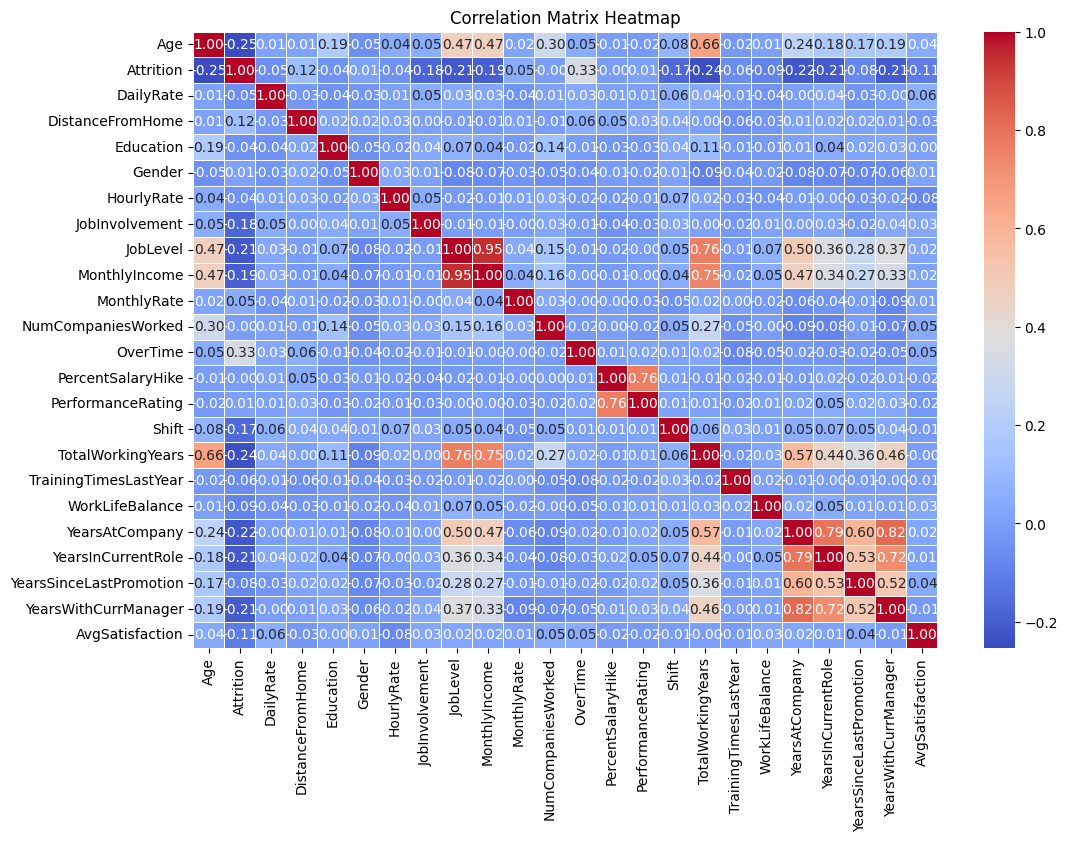

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Generate Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(trainandval_df.drop(['EmployeeID','BusinessTravel','Department','EducationField','JobRole','MaritalStatus'], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

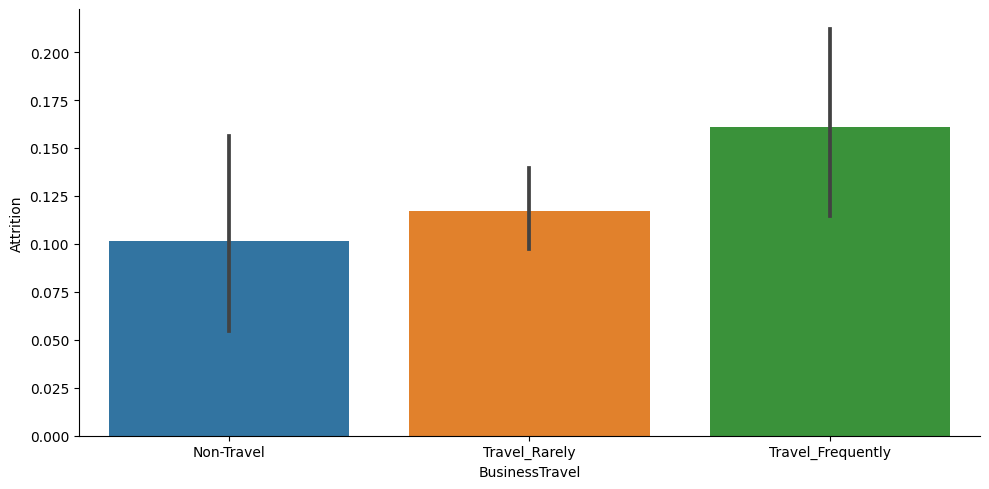

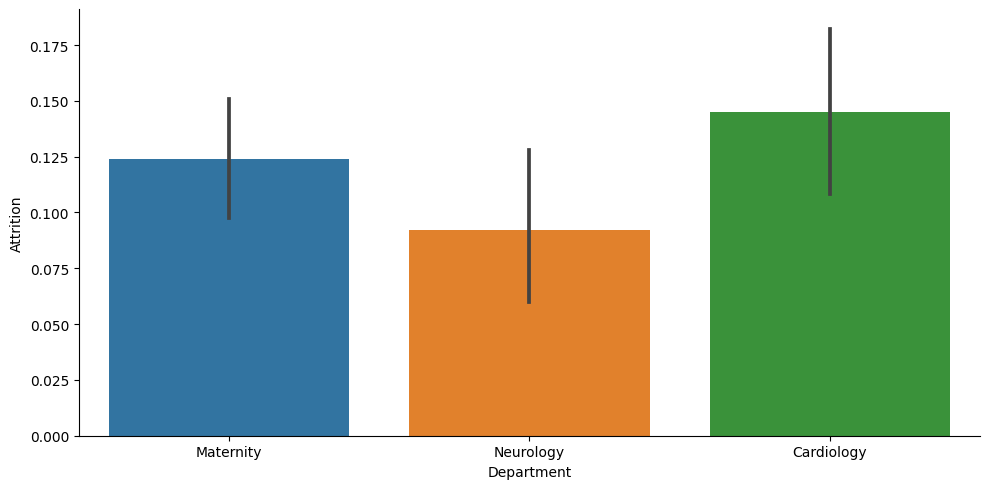

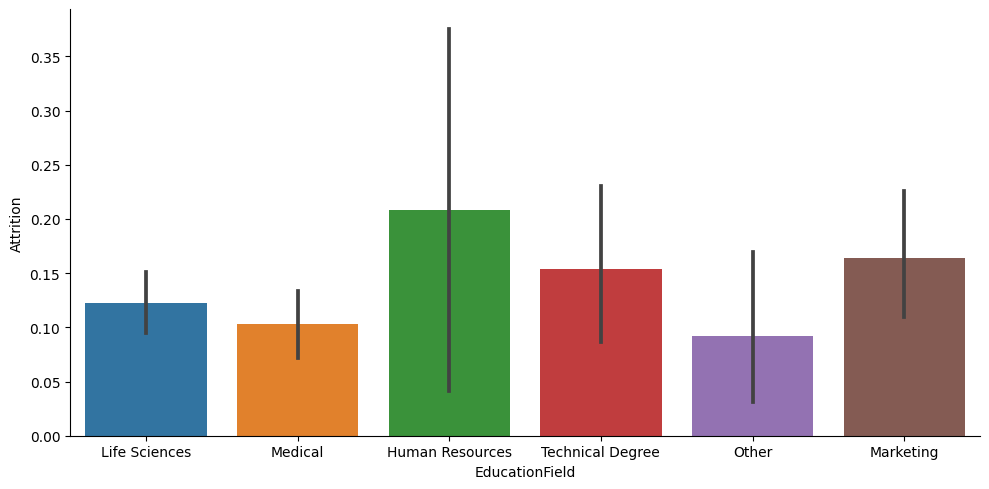

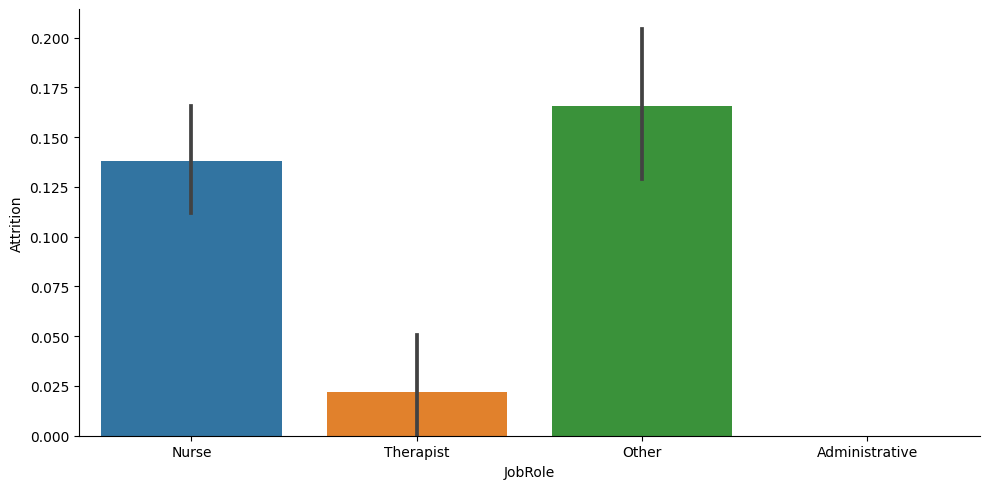

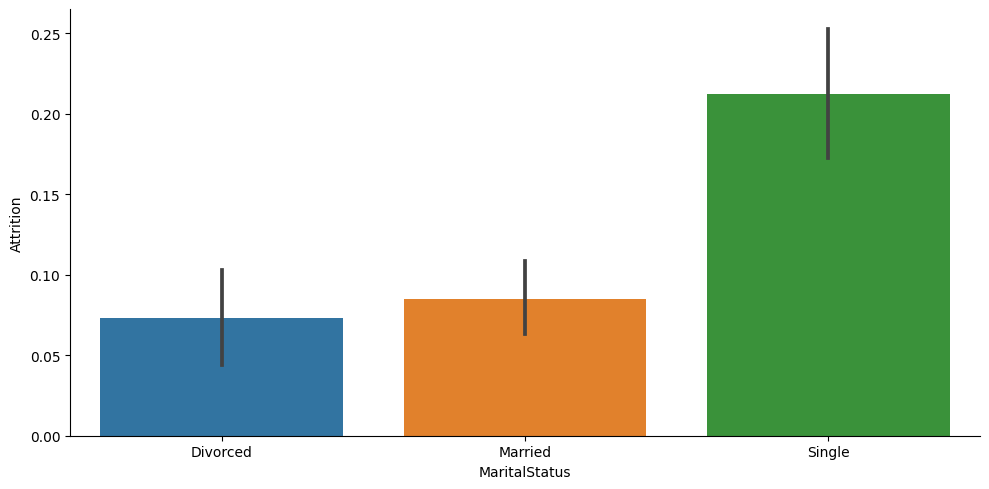

In [11]:
# Generate catplot between Attrition and other features
sns.catplot(x="BusinessTravel", y="Attrition", data=trainandval_df, kind="bar", aspect=2)
sns.catplot(x="Department", y="Attrition", data=trainandval_df, kind="bar", aspect=2)
sns.catplot(x="EducationField", y="Attrition", data=trainandval_df, kind="bar", aspect=2)
sns.catplot(x="JobRole", y="Attrition", data=trainandval_df, kind="bar", aspect=2)
sns.catplot(x="MaritalStatus", y="Attrition", data=trainandval_df, kind="bar", aspect=2)

Based on the above figures, I extract 15 features with the highest correlation with `Attrition` for the following model training. These characteristics are: `OverTime`, `Age`, `TotalWorkingYears`, `YearsAtCompany`, `JobLevel`, `YearsInCurrentRole`, `YearsWithCurrManager`, `MonthlyIncome`, `JobInvolvement`, `Shift`, `DistanceFromHome`, `JobRole`, `MaritalStatus`, `EducationField`, `AvgSatisfaction`

In [12]:
# Extract features
selected_columns = ['OverTime', 'Age', 'TotalWorkingYears','YearsAtCompany','JobLevel','YearsInCurrentRole','YearsWithCurrManager','MonthlyIncome','JobInvolvement','Shift','DistanceFromHome','JobRole','MaritalStatus','EducationField','AvgSatisfaction','Attrition']
trainandval_df = trainandval_df.loc[:, selected_columns]
trainandval_df = pd.get_dummies(data = trainandval_df, columns=['JobRole','MaritalStatus','EducationField'], dtype='int') # convert one column with several types into multiple columns
trainandval_df.head(5)


,OverTime,Age,TotalWorkingYears,YearsAtCompany,JobLevel,YearsInCurrentRole,YearsWithCurrManager,MonthlyIncome,JobInvolvement,Shift,...,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,0.404762,0.40,0.025,2,0.000000,0.000000,0.215355,3,1,...,0,1,0,0,0,1,0,0,0,0
1,0,0.452381,0.25,0.250,2,0.444444,0.411765,0.172748,3,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0.738095,0.50,0.100,2,0.166667,0.176471,0.172696,2,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0.761905,0.50,0.500,1,0.444444,0.470588,0.116642,4,3,...,0,0,1,0,0,0,0,1,0,0
4,1,0.761905,0.55,0.300,4,0.611111,0.294118,0.683611,3,1,...,1,0,1,0,0,1,0,0,0,0


At the same time, I do the same for the test set so that the features between the training set and the test set corresponded.

In [13]:
# Modify the test set
IDs = test_df.loc[:,['EmployeeID']]
test_df = test_df.loc[:, selected_columns]
test_df = pd.get_dummies(data = test_df, columns=['JobRole','MaritalStatus','EducationField'], dtype='int')
test_df.head(5)

,OverTime,Age,TotalWorkingYears,YearsAtCompany,JobLevel,YearsInCurrentRole,YearsWithCurrManager,MonthlyIncome,JobInvolvement,Shift,...,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,0.547619,0.200,0.150,2,0.222222,0.294118,0.262814,3,0,...,0,0,0,1,0,1,0,0,0,0
1,1,0.452381,0.175,0.000,1,0.000000,0.000000,0.057003,2,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0.261905,0.250,0.225,2,0.277778,0.470588,0.167897,2,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0.380952,0.075,0.050,1,0.111111,0.117647,0.087112,3,1,...,0,1,0,0,0,0,0,1,0,0
4,1,0.095238,0.025,0.025,1,0.000000,0.000000,0.101561,4,2,...,0,1,0,0,0,0,0,1,0,0


# 3. Training models
In this section, I use different classifiers to classify the preprocessed dataset.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



#  Preparation before training
X_trainandval = trainandval_df.iloc[:, trainandval_df.columns != trainandval_df.columns[12]] # Features
Y_trainandval = trainandval_df.iloc[:, 12] # Label


# # Seperate train and validation set
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# # Define classifer
# models = {
#     'RandomForest': RandomForestClassifier(),
#     'GradientBoosting': a
#     'LogisticRegression': LogisticRegression()
# }

# for model_name, model in models.items():
#     # train the model
#     model.fit(X_train, y_train)
    
#     # predict
#     Y_val_pred = model.predict(X_val)
    
#     # calculate the accuracy
#     accuracy_val = accuracy_score(Y_val, y_val_pred)
    
#     # output the results
#     print(f"The accuracy of {model_name} is： {accuracy_val}")

In [16]:
# Use models to predict in test set
# GradientBoosting

# model = GradientBoostingClassifier()
# model = RandomForestClassifier()
model = LogisticRegression()
# model = SVC(kernel='linear')
model.fit(X_trainandval, Y_trainandval)
test_df = test_df.drop('Attrition', axis=1)
Y_test_pred = model.predict(test_df)
test_df['Attrition'] = Y_test_pred
test_df['Attrition'] = test_df['Attrition'].map({0: 'No', 1: 'Yes'})
test_df = test_df.loc[:, ['Attrition']]
test_df = pd.concat([IDs,test_df],axis = 1, ignore_index=True)
test_df.columns = ['EmployeeID','Attrition']
test_df.head(5)

,EmployeeID,Attrition
0,1313919,No
1,1060315,Yes
2,1196281,Yes
3,1080660,No
4,1262683,No


In [17]:
# Generate test results file
test_df.to_csv('/kaggle/working/submission.csv', index=False)